## DATA UNDERSTANDING

Data understanding digunakan untuk memahami isi dari dataset tersebut seperti jumlah kolom, tipe dataset, dan isi dataset. Sehingga kita mengetahui data tersebut sebelum kita proses lebih lanjut.

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [63]:
df = pd.read_csv('diabetes.csv')
print('dataset:', df.shape)
print('\ndata info:', df.info())
print('\ndata head:', df.head())

dataset: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

data info: None

data head:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66           

## DATA PREPROSECCING
### FINDING MISSING VALUES
Pada tahap ini memastikan bahwa data yang ingin kita proses tidak ada missing value sehingga tidak mengganggu dalam pemprosesan

In [64]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### STANDARISASI FITUR
Standarisasi fitur merupakan proses transformasi data agar seluruh fitur memiliki skala yang seragam, biasanya dengan rata-rata (mean) = 0 dan simpangan baku (standard deviation) = 1.

In [65]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_scaled = scaled.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

## MODELLING
### 1. Logistic Regression
Logistic Regression adalah model klasifikasi yang digunakan untuk memprediksi probabilitas suatu kelas (biasanya 0 atau 1). Cocok ketika target atau label adalah biner

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('🎯Accuracy:', accuracy_score(y_test, y_pred))
print('\n📊Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\n🧩Classification Report:\n', classification_report(y_test, y_pred))


🎯Accuracy: 0.7532467532467533

📊Confusion Matrix:
 [[79 20]
 [18 37]]

🧩Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



🎯Accuracy : Model berhasil memprediksi dengan benar sebanyak 75.3% dari total data uji (154 sampel). Ini adalah ukuran umum kinerja model, tetapi bisa menyesatkan jika datanya tidak seimbang (misal: jumlah kelas 0 lebih banyak dari kelas 1).

📊Confusion Matrix : Penjelasan per kotak:

True Negative (TN): 79 pasien tidak diabetes diprediksi tidak diabetes → benar.

False Positive (FP): 20 pasien tidak diabetes diprediksi diabetes → salah.

False Negative (FN): 18 pasien diabetes diprediksi tidak diabetes → salah.

True Positive (TP): 37 pasien diabetes diprediksi diabetes → benar.

🧩Classification Report: 

- Untuk Kelas 0 (Tidak Diabetes)
Precision 0.81: Dari semua yang diprediksi tidak diabetes, 81% benar.

Recall 0.80: Dari semua pasien yang benar-benar tidak diabetes, 80% berhasil dideteksi.

F1-score 0.81: Gabungan precision dan recall, menunjukkan performa yang stabil.

- Untuk Kelas 1 (Diabetes)
Precision 0.65: Dari semua yang diprediksi diabetes, hanya 65% benar.

Recall 0.67: Dari semua pasien yang benar-benar diabetes, hanya 67% berhasil dideteksi.

F1-score 0.66: Artinya, model masih agak kurang maksimal dalam mendeteksi pasien diabetes.

## 2. Random Forest
Random Forest adalah ensemble method berbasis decision tree yang membuat banyak pohon keputusan, lalu menggabungkan hasilnya (voting atau rata-rata) untuk membuat prediksi yang lebih akurat dan stabil.

🎯 Accuracy: 0.7272727272727273

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154


🧩 Confusion Matrix:
 [[78 21]
 [21 34]]


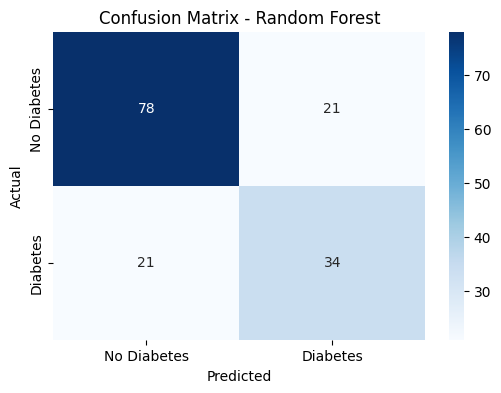

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Bangun model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Prediksi
y_pred = rf.predict(X_test)

# Evaluasi model
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

🎯Accuracy : Ini menunjukkan bahwa model kamu memprediksi benar sebanyak 72.7% dari seluruh data uji.

📊Confusion Matrix : 
- True Negatives (TN) = 78 → Pasien tidak diabetes diprediksi tidak diabetes → benar

- False Positives (FP) = 21 → Pasien tidak diabetes diprediksi diabetes → salah

- False Negatives (FN) = 21 → Pasien diabetes diprediksi tidak diabetes → salah

- True Positives (TP) = 34 → Pasien diabetes diprediksi diabetes → benar

🧩Classification Report:
- Kelas 0 (Tidak Diabetes):
Precision: 0.79 → 79% dari prediksi "tidak diabetes" memang benar.

Recall: 0.79 → 79% dari pasien yang benar-benar tidak diabetes berhasil dikenali.

F1-score: 0.79 → Harmoni antara precision & recall → performa bagus untuk kelas ini.

- Kelas 1 (Diabetes):
Precision: 0.62 → Dari seluruh prediksi "diabetes", hanya 62% yang benar.

Recall: 0.62 → Model hanya bisa menangkap 62% pasien yang benar-benar diabetes.

F1-score: 0.62 → Masih cukup rendah, menandakan model kesulitan menangkap pola diabetes.

## PRINCIPAL ANALYSIST COMPONENT (PCA)
PCA (Principal Component Analysis) adalah metode reduksi dimensi yang digunakan untuk menyederhanakan dataset dengan mengurangi jumlah fitur (kolom), sambil tetap mempertahankan informasi (varian) yang paling penting.

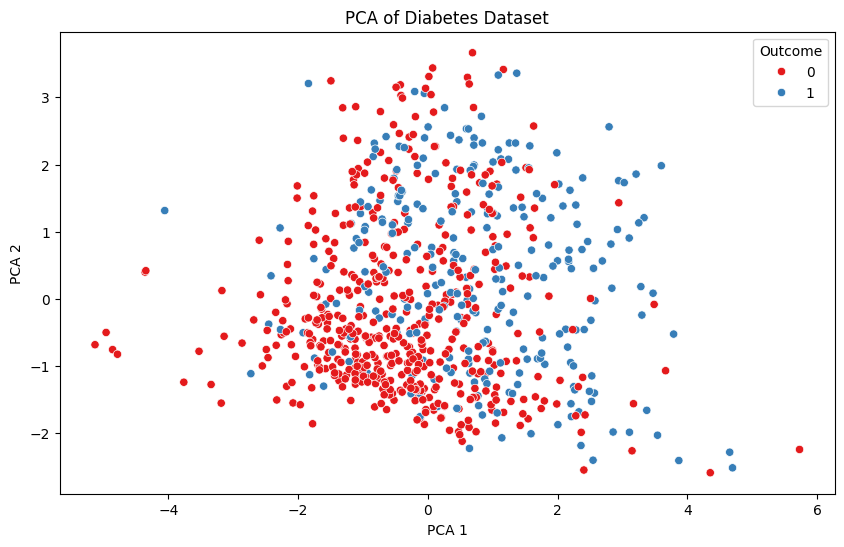

Explained Variance Ratio: [0.26179749 0.21640127]
Total Variance Tertangkap: 0.4781987607385658


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Outcome'] = y.values

# Visualisasi PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Outcome', palette='Set1')
plt.title('PCA of Diabetes Dataset')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Outcome')
plt.show()

# Variance yang dijelaskan oleh PCA
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Tertangkap:", sum(pca.explained_variance_ratio_))


🪂Explained Variance Ratio : 
- Komponen utama pertama (PC1) menangkap sekitar 26.18% dari total variasi dalam data.
- Komponen utama kedua (PC2) menangkap sekitar 21.64% dari total variasi dalam data.

🛸Total Variance Tertangkap: 
-Dua komponen utama ini secara kumulatif menangkap sekitar 47.82% dari total informasi atau variasi dalam dataset awal.
Artinya hampir setengah informasi dalam data asli dapat direpresentasikan hanya dengan 2 dimensi (PC1 dan PC2). Ini sudah cukup baik untuk keperluan visualisasi atau analisis awal.

